## Example 3

> We are going to create a neural network for predicting the closing stock price and use the analysis for evaluation of risk factors

In [52]:
# Charging the necesary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [53]:
# Charging the data
df = pd.read_csv('AMZN_data.csv')
df.head()

,date,open,high,low,volume,close,Name
0,08/02/2013,261.40,265.25,260.555,3879078,261.95,AMZN
1,11/02/2013,263.20,263.25,256.600,3403403,257.21,AMZN
2,12/02/2013,259.19,260.16,257.000,2938660,258.70,AMZN
3,13/02/2013,261.53,269.96,260.300,5292996,269.47,AMZN
4,14/02/2013,267.37,270.65,265.400,3462780,269.24,AMZN


In [54]:
# Data Preprocessing
df = df[['open','high','low','volume','close']]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

In [55]:
df

,open,high,low,volume,close
0,261.40,265.25,260.555,3879078,261.95
1,263.20,263.25,256.600,3403403,257.21
2,259.19,260.16,257.000,2938660,258.70
3,261.53,269.96,260.300,5292996,269.47
4,267.37,270.65,265.400,3462780,269.24
...,...,...,...,...,...
1254,1445.00,1459.88,1385.140,9113808,1390.00
1255,1477.39,1498.00,1414.000,11125722,1429.95
1256,1402.62,1458.98,1320.720,11494985,1390.00
1257,1361.46,1443.99,1351.790,11066819,1442.84


In [56]:
# Selecting the features (X) and the targets (y)
X = scaled_data[:, :-1]
y = scaled_data[:, -1]

In [57]:
# Segmenting the data in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Building the Neural Network Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [59]:
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 0.0170
Epoch 2/100
32/32 - 0s - loss: 4.2574e-04
Epoch 3/100
32/32 - 0s - loss: 8.5359e-05
Epoch 4/100
32/32 - 0s - loss: 3.7180e-05
Epoch 5/100
32/32 - 0s - loss: 2.9674e-05
Epoch 6/100
32/32 - 0s - loss: 2.7708e-05
Epoch 7/100
32/32 - 0s - loss: 2.6376e-05
Epoch 8/100
32/32 - 0s - loss: 2.6127e-05
Epoch 9/100
32/32 - 0s - loss: 2.4467e-05
Epoch 10/100
32/32 - 0s - loss: 2.3735e-05
Epoch 11/100
32/32 - 0s - loss: 2.6202e-05
Epoch 12/100
32/32 - 0s - loss: 2.3800e-05
Epoch 13/100
32/32 - 0s - loss: 2.4610e-05
Epoch 14/100
32/32 - 0s - loss: 2.6890e-05
Epoch 15/100
32/32 - 0s - loss: 2.6206e-05
Epoch 16/100
32/32 - 0s - loss: 2.3145e-05
Epoch 17/100
32/32 - 0s - loss: 2.4746e-05
Epoch 18/100
32/32 - 0s - loss: 2.3274e-05
Epoch 19/100
32/32 - 0s - loss: 2.4812e-05
Epoch 20/100
32/32 - 0s - loss: 2.3808e-05
Epoch 21/100
32/32 - 0s - loss: 2.6195e-05
Epoch 22/100
32/32 - 0s - loss: 2.6434e-05
Epoch 23/100
32/32 - 0s - loss: 2.2722e-05
Epoch 24/100
32/32 - 0s 

In [60]:
# Evaluating the model
training_loss = model.evaluate(X_train, y_train, verbose=2)
print(f'Training error: {training_loss}')
loss = model.evaluate(X_test, y_test, verbose=2)
print(f'Error en el conjunto de prueba: {loss}')

32/32 - 0s - loss: 9.2742e-05
Training error: 9.274240437662229e-05
8/8 - 0s - loss: 8.8473e-05
Error en el conjunto de prueba: 8.847322897054255e-05


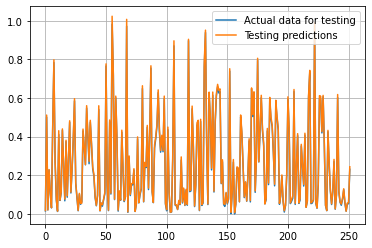

In [61]:
# Making predictions
training_predictions = model.predict(X_train)
testing_predictions = model.predict(X_test)

# plotting predictions
# plt.plot(y_train.flatten(), label='Actual data for training')
# plt.plot(training_predictions.flatten(), label='Training predictions')
plt.plot(y_test, label='Actual data for testing')
plt.plot(testing_predictions, label='Testing predictions')
plt.legend()
plt.grid()
plt.savefig('Comparison.pdf');


In [62]:
# Making future predictions
future_predictions = model.predict(X_test[-10:])  # For example, predciting the next 10 points
print('Future predictions:')
for prediction in future_predictions:
    print(prediction)

Future predictions:
[0.11810625]
[0.06272384]
[0.05106414]
[0.08066767]
[0.1302712]
[0.0630514]
[0.01402508]
[0.05661888]
[0.05777455]
[0.24389493]


In [63]:
# Computing the mean absolute error (MAE)
mae = np.mean(np.abs(testing_predictions - y_test))
print(f'Mean absolute error: {mae}')

Mean absolute error: 0.25951617863002546


En el código anterior, el enfoque se centra en la predicción del precio de cierre de las acciones utilizando un modelo de redes neuronales. Sin embargo, es importante destacar que el análisis de riesgo en el contexto financiero puede requerir un enfoque más amplio e incluir múltiples variables y métricas para evaluar y mitigar los riesgos asociados a las inversiones.

Sin embargo, para un análisis de riesgo más completo, se pueden considerar otros aspectos, como:

> ``Diversificación de la cartera``: Evaluar la distribución de los activos en una cartera de inversión y analizar su relación de correlación y volatilidad para diversificar los riesgos.

> ``Métricas de riesgo adicionales``: Calcular métricas de riesgo como el Value at Risk (VaR) y el Conditional Value at Risk (CVaR) para estimar la probabilidad y el nivel de pérdidas potenciales en diferentes escenarios.

> ``Factores macroeconómicos``: Considerar factores macroeconómicos, como tasas de interés, indicadores económicos, políticas gubernamentales y eventos internacionales, que pueden tener impacto en los riesgos financieros.

> ``Análisis fundamental y técnico``: Utilizar análisis fundamental y técnico para evaluar la salud financiera de las empresas, identificar oportunidades y riesgos específicos de la industria, y tomar decisiones de inversión más informadas.

### Computing the Value at Risk (VaR)

La ecuación del Value at Risk (VaR) es una medida utilizada en el análisis de riesgo financiero para estimar la pérdida máxima esperada en una inversión en un horizonte de tiempo determinado, con un nivel de confianza especificado. La ecuación del VaR depende del método y la distribución utilizados para calcularlo.

El cálculo del VaR puede variar según el enfoque utilizado, como el VaR paramétrico, el VaR histórico y el VaR de simulación Monte Carlo. A continuación, se proporciona la ecuación general del VaR paramétrico:

> VaR = -μ + z * σ

Donde:

> ``μ:`` Valor esperado de la distribución de rendimientos.

> ``z:`` Valor crítico correspondiente al nivel de confianza deseado (por ejemplo, z = 1.96 para un nivel de confianza del 95% en una distribución normal estándar).

> ``σ:`` Desviación estándar de la distribución de rendimientos.
Esta ecuación proporciona una estimación del valor máximo de pérdida esperada (en términos monetarios) en una inversión durante un horizonte de tiempo específico, con un nivel de confianza determinado.

In [64]:
# Computing the Value at Risk (VaR)
alpha = 0.95
var = np.percentile(y_test - testing_predictions, 100 * (1 - alpha))
print(f'VaR al {alpha*100}%: {var}')

VaR al 95.0%: -0.5724040441504099


Un valor de VaR (Value at Risk) del -0.5586119966024988, con un nivel de confianza del 95%, indica que existe un 5% de probabilidad de que la pérdida en una inversión supere ese valor en un horizonte de tiempo dado.

En otras palabras, para una cartera de inversiones o activo específico, con un nivel de confianza del 95%, se estima que la pérdida máxima esperada no superará -0.5586119966024988. Es importante tener en cuenta que este valor está expresado en la misma unidad que la variable objetivo utilizada en el cálculo (en este caso, el precio de cierre de las acciones).

En esta ecuación, y_test representa los valores reales de la variable objetivo (en este caso, los precios de cierre de las acciones en el conjunto de prueba), y testing_predictions son las predicciones realizadas por el modelo para esos valores.

La diferencia entre los valores reales y las predicciones (y_test - testing_predictions) representa los errores de predicción. Luego, se utiliza la función np.percentile() para calcular el percentil correspondiente a un nivel de confianza dado (1 - alpha). En este caso, el nivel de confianza se establece en alpha = 0.95 (es decir, 95% de confianza).

In [65]:
# Calcular el Conditional Value at Risk (CVaR)
errors = y_test - testing_predictions
cvar = np.mean(errors[errors <= var])
print(f'CVaR al {alpha*100}%: {cvar}')

CVaR al 95.0%: -0.7092098792145017


Si el VaR es positivo, indica una pérdida máxima esperada, mientras que si es negativo, puede indicar un beneficio esperado en lugar de una pérdida.

Sin embargo, es importante tener en cuenta que el VaR por sí solo no proporciona una imagen completa del perfil de riesgo de una inversión o cartera